# Project 1  - Data Preprocessing

### Dataset - Candy Hierarchy 2017
https://www.scq.ubc.ca/so-much-candy-data-seriously/

### Imports

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import json
import csv
import collections
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering

### Define functions and variables

In [38]:
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

unit_dict = np.load('dictionary.npy',allow_pickle='TRUE').item()

### Read in dataset as Pandas dataframe

In [39]:
df = pd.read_csv('./data/candyhierarchy2017.csv', encoding = "ISO-8859-1")

# Removing of unnecessary rows

In [40]:
#drop rows base on their index value.
#To test this, drop index 0 first since that row do not have any record.
df = df.drop(0)

#Show and check if the row is deleted
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"


Begin dropping rows: upon observation, rows that have multiple missing data starts to miss input in the column  "Q6 | Any full-sized candy bar," so this column is used as a "filter" to drop these rows.

In [41]:
df = df.dropna(subset = ['Q6 | Any full-sized candy bar'])
df.head()

#create a new updated candyfile dataset
df.to_csv('updated_candy_set_rows.csv')

## After this process, rows are now sorted with the ones that have multiple data entry

# Removing of Unnecessary Columns
---
This is the removing of columns that are deemed as not needed for our finalized data, so as part of the preprocessing process we are removing said data.

After storing the data to a file, by looking at the survey that was provided for the candy hierarchy, columns will be dropped because they do not serve a value.

---

The following colums were removed for these reasons:
- > Internal ID: No value with our data
- > Q1 : Not a candy question
- > Q6 : Not a candy
- > Q7, Q8, Q9: Comments serving no value
- > Q10, Q11, Q13: Not a candy question
- > Unamed: 113: Blank column with no value
- > Click Coordinates (x, y): Not of significant value to candy data

In [42]:
# All columns from the data set that will be removed
col_remove = ["Internal ID", "Q1: GOING OUT?", 
"Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)", 
"Q6 | Any full-sized candy bar", "Q6 | Bonkers (the board game)", "Q6 | Box'o'Raisins",
"Q6 | Broken glow stick", 
"Q6 | Candy that is clearly just the stuff given out for free at restaurants", 
"Q6 | Cash, or other forms of legal tender", "Q6 | Chardonnay", 
"Q6 | Chick-o-Sticks (we donÕt know what that is)",
"Q6 | Creepy Religious comics/Chick Tracts", "Q6 | Dental paraphenalia", 
"Q6 | Generic Brand Acetaminophen", "Q6 | Glow sticks", "Q6 | Green Party M&M's", 
"Q6 | Gum from baseball cards", "Q6 | Independent M&M's",
"Q6 | Gummy Bears straight up", "Q6 | Healthy Fruit", "Q6 | Hugs (actual physical hugs)",
"Q6 | Jolly Rancher (bad flavor)", "Q6 | JoyJoy (Mit Iodine!)", "Q6 | Senior Mints",
"Q6 | Kale smoothie", "Q6 | Abstained from M&M'ing.", "Q6 | Pencils", 
"Q6 | Mint Juleps", "Q6 | Spotted Dick", "Q6 | Minibags of chips", 
"Q6 | Real Housewives of Orange County Season 9 Blue-Ray",
"Q6 | Sandwich-sized bags filled with BooBerry Crunch",
"Q6 | Those odd marshmallow circus peanut things", 
"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein", 
"Q6 | Vicodin", "Q6 | White Bread", "Q6 | Whole Wheat anything", 
"Q7: JOY OTHER", "Q8: DESPAIR OTHER", "Q9: OTHER COMMENTS", "Q10: DRESS", 
"Unnamed: 113", "Q11: DAY", "Q12: MEDIA [Daily Dish]", "Q12: MEDIA [Science]", "Q12: MEDIA [ESPN]", 
"Q12: MEDIA [Yahoo]", "Click Coordinates (x, y)"]

# Files are dropped from the dataframe
df = df.drop(columns = col_remove)

# New dataframe is saved to relative file location and name
df.to_csv('candydata_col_removed.csv')

### Columns in the data are now removed and stored to the variable in the final line of code above.

# Cleaning Age Values

Removing rows where age is not an integer

In [43]:
df = df[pd.to_numeric(df['Q3: AGE'], errors='coerce').notnull()]

# Normalizing Genders
 Normalizing and mapping to values

Replacing NaN with "I'd rather not say" since it makes more sense, rather than just deleting...

In [44]:
df['Q2: GENDER'].fillna(value = "I'd rather not say", inplace = True)

Maps a value to each...

In [45]:
df2 = {"Male": '0', 'Female': '1', "I'd rather not say" : '2', 'Other' : '3' }
df = df.replace({"Q2: GENDER": df2})

# Normalizing Countries

In [46]:
dict_from_csv = {}

with open('CountryDict.csv', mode='r') as inp:
    reader = csv.reader(inp)
    dict_from_csv = {rows[0]:rows[1] for rows in reader}

# test = pd.DataFrame(file['Q4: COUNTRY'])
# test2 = test.replace(dict_from_csv)
df = df.replace({'Q4: COUNTRY': dict_from_csv})
df = df.dropna(subset=['Q4: COUNTRY'])
encode_text_index(df, 'Q4: COUNTRY')

array([' USA', 'ASTL', 'CAN', 'CHIN', 'Can', 'DEN', 'FRAN', 'GER', 'GRBR',
       'GRC',
       'I pretend to be from Canada, but I am really from the United States.',
       'ICLD', 'IRE', 'JPN', 'KOR', 'MEX', 'NETH', 'RICA', 'SAFR', 'SING',
       'SPN', 'SWTZ', 'TWAN', 'U.S. ', 'UAE', 'USA', 'USa'], dtype=object)

# Normalizing States, Cities, Provinces

Convert dictionary and target column to uppercase before mapping

In [47]:
unit_dict =  {k.upper(): v for k, v in unit_dict.items()}
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.upper()

Map values in column to their corresponding dictionary key

In [48]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].map(unit_dict).fillna(df['Q5: STATE, PROVINCE, COUNTY, ETC'])

Display counts of unique values after mapping

In [49]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts()

CA                      234
WA                       91
NY                       89
IL                       75
TX                       69
                       ... 
QUEENS                    1
KALAMAZOO COUNTY, MI      1
A                         1
MARYLAND                  1
SC                        1
Name: Q5: STATE, PROVINCE, COUNTY, ETC, Length: 162, dtype: int64

Label encode each state or province after mapping

In [50]:
encode_text_index(df, 'Q5: STATE, PROVINCE, COUNTY, ETC')

array(['A', 'AB', 'ABERDEENSHIRE', 'ABU DHABI', 'AK', 'AL',
       'ALAMEDA COUNTY, CALIFORNIA', 'AMERICA', 'AR', 'ATLANTA, GA', 'AZ',
       'BAJA CALIFORNIA', 'BC', 'BERKELEY, CA', 'BERLIN',
       'BLOOMINGTON, IN', 'BRITISH COLUMBIA, CANADA', 'BROOKLYN',
       'BROOKLYN, KINGS COUNTY NY', 'BUNCOMBE COUNTY, NORTH CAROLINA',
       'CA', 'CALIFOR', 'CALIFORNIA, CONTRA COSTA COUNTY, PLEASANT HILL',
       'CALIFORNIA, MENDOCINO COUNTY', 'CALIFORNIA, SAN DIEGO',
       'CALIFORNIA, SAN FRANCISCO', 'CANADA', 'CASCADIA', 'CHICAGO, IL',
       'CO', 'COOK', 'CT', 'DC', 'DC ', 'DE', 'DERBYSHIRE', 'DEVONSHIRE',
       'DUBLIN', 'DURHAM COUNTY, NORTH CAROLINA', 'EDINBURGH',
       'EMERALD CITY, PETROLIA', 'ENG', 'FL', 'FL ', 'GA', 'GLASGOW',
       'GREIFSWALD', 'HESSE', 'HESSEN', 'HI', 'HONG KONG', 'IA', 'ID',
       'IDF', 'IL', 'ILLINOIS  ', 'IN', 'INDIANA ',
       'KALAMAZOO COUNTY, MI', 'KENT', 'KILDARE', 'KS', 'KWAZULU-NATAL',
       'KY', 'LA', 'LONDON', 'MA', 'MADRID', 'MANCHESTER

# Normalizing Candy Ratings

In [51]:
for index in df.columns:
    df[index] = df[index].replace(['MEH', 'JOY', 'DESPAIR'], ['1', '2', '0'])

print(df)

     Q2: GENDER Q3: AGE  Q4: COUNTRY  Q5: STATE, PROVINCE, COUNTY, ETC  \
1             0      44           25                                96   
3             0      40           25                               111   
4             0      23           25                               114   
7             0      33            2                               108   
8             0      40            2                               108   
...         ...     ...          ...                               ...   
2454          1      26           25                                79   
2455          0      24           25                                74   
2456          1      33           25                               104   
2457          1      26           25                               140   
2459          1      66           25                               114   

     Q6 | 100 Grand Bar Q6 | Black Jacks Q6 | Bonkers (the candy)  \
1                     1                1  

## Replacing missing values options
---
### Replace with meh
    > file[index] = file[index].fillna(1)
- Decided upon this for candy sections because mean would not work for our categorical needs

### Replace with new value
    > file[index] = file[index].fillna(2)
- Decided upon this for gender and location

### Replace with mean
    > To use/do mean, make sure that data is in int
    > file[index] = file[index].fillna(file[index].mean())
- Decided upon this for age

In [52]:
# This for loop loops through every column in the data set
for index in df.columns:
    if index == 'Q2: GENDER':
        # Gender fill in | Creating a third option of other/nan
        df[index] = df[index].fillna(2)
    elif index == 'Q3: AGE':
        # Age fill in | Age must be normalized for this to work (no strings)
        df[index] = df[index].fillna(df[index].mean())
        pass
    elif index == 'Q4: COUNTRY' or index == 'Q5: STATE, PROVINCE, COUNTY, ETC':
        # Country & State/Province fill in | Creating a third option of other/nan
        df[index] = df[index].fillna(0)  
    else: # If it is in the candy column
        df[index] = df[index].fillna(1)

df.head()

,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bottle Caps,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,...,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,Q6 | Whatchamacallit Bars,Q6 | York Peppermint Patties
1,0,44,25,96,1,1,0,0,0,1,...,1,0,0,0,2,2,0,2,0,0
3,0,40,25,111,1,1,1,1,1,1,...,2,1,2,1,0,2,1,2,2,0
4,0,23,25,114,2,0,1,1,1,1,...,1,0,1,0,2,2,0,2,2,2
7,0,33,2,108,2,0,0,2,2,2,...,2,1,1,0,2,1,0,2,0,0
8,0,40,2,108,2,1,1,1,2,1,...,0,0,0,0,1,2,0,2,1,0


In [100]:
df = df.drop(['Q3: AGE', 'Q4: COUNTRY', 'Q5: STATE, PROVINCE, COUNTY, ETC'], axis=1)

In [101]:
df.head()

,Q2: GENDER,Q6 | 100 Grand Bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bottle Caps,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Caramellos,Q6 | Chiclets,...,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,Q6 | Whatchamacallit Bars,Q6 | York Peppermint Patties
1,0,1,1,0,0,0,1,1,1,0,...,1,0,0,0,2,2,0,2,0,0
3,0,1,1,1,1,1,1,0,1,1,...,2,1,2,1,0,2,1,2,2,0
4,0,2,0,1,1,1,1,0,2,0,...,1,0,1,0,2,2,0,2,2,2
7,0,2,0,0,2,2,2,2,2,1,...,2,1,1,0,2,1,0,2,0,0
8,0,2,1,1,1,2,1,0,1,0,...,0,0,0,0,1,2,0,2,1,0


In [102]:
x, y = to_xy(df, 'Q2: GENDER')

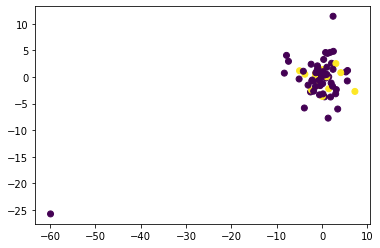

In [111]:
plt.scatter(test[:, 0], test[:, 1], c = s_cluster)
plt.show()

In [106]:
print(np.diag(S) @ VT)

[[-5.9916286e+01 -2.5729923e+01 -3.3803242e+01 ... -7.3361717e+01
  -5.6374355e+01 -6.2797676e+01]
 [-7.8563013e+00  4.0748830e+00  6.2488542e+00 ... -6.5664597e+00
  -3.9744203e+00 -5.9191589e+00]
 [ 2.4195511e+00  1.1429191e+01  3.5610154e+00 ... -2.3612862e+00
   2.1029394e+00  3.2371786e+00]
 ...
 [-1.9801483e-01  9.0826416e-01 -7.7546053e-02 ...  1.4933918e+00
   9.7095186e-01 -1.9048780e+00]
 [ 5.6615365e-01  3.9436427e-01 -1.5025625e-01 ...  3.7663245e+00
  -5.4379386e-01 -1.1751549e-01]
 [-1.3752078e-01  7.9553388e-02  2.4931876e-02 ... -7.0622787e-02
   1.9171286e-01  1.7588048e-01]]


In [57]:
x.shape

(1735, 71)

In [58]:
y.shape

(1735,)

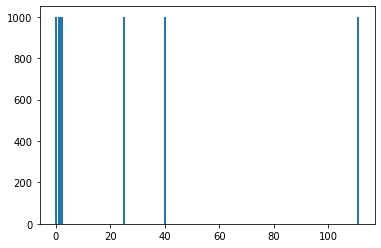

In [80]:
plt.bar(x[1], 1000, width=0.8, bottom=None)
plt.show()

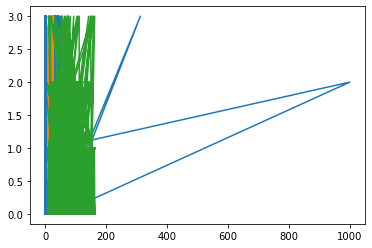

In [90]:
plt.plot(x, y)
plt.show()

In [ ]:
U, S, VT = svd(x)
print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

In [ ]:
test = np.diag(S) @ VT
plt.plot(test)
plt.show()

In [ ]:
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(test)